# QUESTION 3

In [3]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Function for Creating Dataset

In [4]:
"""
Create random dataset - inside and outside circle of radius 1
    x: cartesian coordinates (x1,x2) => over region -2 <x1< 2 and -2 <x2< 2 
    y: f(x1,x2) = +1 if (x1^2 + x2^2) <= 1 ; -1 if (x1^2 + x2^2) > 1
    
"""

def create_dataset(n_data):
    # create random i and j values between 0 and 20
    i = np.random.randint(0,21,n_data) 
    j = np.random.randint(0,21,n_data)
    # Create feature X1, feature X2 and y based on given constraint
    x1 = -2+0.2*i
    x2 = -2+0.2*j
    y = np.where((x1**2 + x2**2 > 1),int(-1),int(1))
    # Stack x1,x2 and y vertically to form the dataset
    data = np.vstack((x1,x2,y)).T
    return data
        

## RBFN model and training methods

In [5]:
def signum(x):
    #Signum activation function for output node
    return np.sign(x)

class RBFN ():
    def __init__(self,sigma,n_cluster=None,k_means=False,random_centers=False):
        """
        RBFN - Radial basis function network
            sigma - spread parameter 
            n_cluster - no of centers (hidden layer nodes)
            k_means - Do not perform k_means by default
            random_centers - Perform np.random.choice to select the centers
        """
        self.k_means = k_means
        self.random_centers = random_centers
        self.n_cluster = n_cluster
        self.sigma = sigma
        print("Sigma:",self.sigma)
        
        
    def create_centers(self,x):
        
        # If KMEANS is given TRUE, find the centers using sklearn.cluster.k_means
        if self.k_means:
            self.v=KMeans(n_clusters=self.n_cluster).fit(x).cluster_centers_
        # If random_centers is given TRUE find the centers randomly using np.random.choice
        elif(self.random_centers):
            index=np.random.choice(x.shape[0],self.n_cluster,replace=False)
            self.v=x[index]
        # Take no of centers same as input by DEFAULT
        else:
            self.v = x.copy()

    def euclidean_distance(self,x_i,center):
        # FInd the Euclidean distance between center and the choosen input 
        return np.linalg.norm(x_i-center)
    
    def G(self,x):
        # RBF kernel function 
        self.g=np.zeros((len(x),len(self.v))) # Create array of zeros with dimension (inputDim,CenterDim)
        for ind_x,inp in enumerate(x):
            for ind_c,center in enumerate(self.v):
                rbf=self.gaussiankernel(center,inp)
                self.g[ind_x][ind_c]=rbf
        return self.g
    
    def weight(self,x,y):
        # FInding the weight using G and Y_actual
        g=self.G(x)
        gg_inv = np.linalg.pinv(g)    
        self.w=np.dot(gg_inv,y)
        return self.w

    def gaussiankernel(self, center, point):
        return np.exp((-1 / (2*self.sigma**2))*np.linalg.norm(point-center)**2)
    
    def D_cap(self,x):
        self.d_cap=np.dot(self.G(x),self.w) #D_cap is the predicted output
        return signum(self.d_cap)
    
    def train(self,x,y):
        # training procedure to update the weights
        self.create_centers(x)
        self.weight(x,y)
        y_p = self.D_cap(x)
        print("Training Accuracy:",self.accuracy(y,y_p))
    
    def mse(self,y_true,y_pred):
        #Mean square Error calculation
        mse = ((y_true - y_pred)**2).mean(axis=0)
        return mse[0]
    
    def accuracy(self,y_true, y_pred):
        #Accuracy calculation
        if not (len(y_true) == len(y_pred)):
            print('Size of predicted and true labels not equal.')
            return 0.0
        
        corr = 0
        y_true=y_true.flatten()
        y_pred=y_pred.flatten()
        for i in range(len(y_true)):
            if y_true[i]==y_pred[i]:
                corr+=1

        return corr/len(y_true)
    
    def predict(self,x_test):
        y_pred= self.D_cap(x_test)
        return y_pred
    
    def getWeight(self):
        return self.w
    
    def getG(self):
        return self.g
        
    
    

## Preparation of Dataset

In [17]:
# Create dataset with 441 sampled data
dataset = create_dataset(441)
# Shuffle and split the data into TRAIN SET and TEST SET
np.random.shuffle(dataset)
train_pro=int(len(dataset)*0.8)
train, test = dataset[:train_pro,:], dataset[train_pro:,:]
sigma = [0.1,0.35,0.5,0.6,0.7,0.8,0.9,1,3,5,7.5,10]
X_train=train[:,:2]
X_test = test[:,:2]
y_train=train[:,2:]
y_test=test[:,2:]

In [18]:
print("X_train:{},X_test:{},y_train:{},y_test:{}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))
print("sigma = [0.1,0.35,0.5,0.6,0.7,0.8,0.9,1,3,5,7.5,10]")

X_train:(352, 2),X_test:(89, 2),y_train:(352, 1),y_test:(89, 1)
sigma = [0.1,0.35,0.5,0.6,0.7,0.8,0.9,1,3,5,7.5,10]


### Part 1: Using centers equal to training set

Sigma: 0.1
Training Accuracy: 1.0
Test Accuracy:0.9887640449438202  ; MSE:0.0449438202247191
Sigma: 0.35
Training Accuracy: 1.0
Test Accuracy:0.9213483146067416  ; MSE:0.3146067415730337
Sigma: 0.5
Training Accuracy: 1.0
Test Accuracy:0.8539325842696629  ; MSE:0.5842696629213483
Sigma: 0.6
Training Accuracy: 1.0
Test Accuracy:0.8089887640449438  ; MSE:0.7640449438202247
Sigma: 0.7
Training Accuracy: 1.0
Test Accuracy:0.7191011235955056  ; MSE:1.1235955056179776
Sigma: 0.8
Training Accuracy: 1.0
Test Accuracy:0.8876404494382022  ; MSE:0.449438202247191
Sigma: 0.9
Training Accuracy: 1.0
Test Accuracy:0.8876404494382022  ; MSE:0.449438202247191
Sigma: 1
Training Accuracy: 1.0
Test Accuracy:0.9213483146067416  ; MSE:0.3146067415730337
Sigma: 3
Training Accuracy: 0.9914772727272727
Test Accuracy:0.9887640449438202  ; MSE:0.0449438202247191
Sigma: 5
Training Accuracy: 0.9886363636363636
Test Accuracy:0.9887640449438202  ; MSE:0.0449438202247191
Sigma: 7.5
Training Accuracy: 0.991477272727272

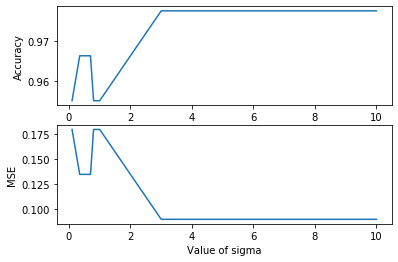

CPU times: user 1min 15s, sys: 2.57 s, total: 1min 18s
Wall time: 1min 8s


In [19]:
%%time
acc_list1=[]
err_list1=[]
#Looping through Sigma values
for sig in sigma:
    model=RBFN(sig) # Create Model object with centers same as training set
    model.train(X_train,y_train) # Train the model with training dataset
    y_pred=model.predict(X_test) # Predict the output using test dataset
    acc=model.accuracy(y_test,y_pred) # Accuracy of the model
    err=model.mse(y_test,y_pred) # MSE of the model
    print("Test Accuracy:{}  ; MSE:{}".format(acc,err))
    err_list1.append(err)
    acc_list1.append(acc)


# Ploting accuracy and MSE
fig, ax = plt.subplots(2,1)

ax[0].plot(sigma,acc_list)
ax[0].set_xlabel('Value of sigma')
ax[0].set_ylabel('Accuracy')


ax[1].plot(sigma,err_list)
ax[1].set_xlabel('Value of sigma')
ax[1].set_ylabel('MSE')
plt.show()

**Best Spread parameter = 3**  
- Training accuracy = 99.14    
- Test accuracy = 98.87  
- MSE = 0.04494
- Execution time - 68 sec

### PART:2.1 Using Random 150 centers

Sigma: 0.1
Training Accuracy: 0.9914772727272727
Test Accuracy:0.9887640449438202  ; MSE:0.0449438202247191
Sigma: 0.35
Training Accuracy: 0.9971590909090909
Test Accuracy:0.9887640449438202  ; MSE:0.0449438202247191
Sigma: 0.5
Training Accuracy: 1.0
Test Accuracy:0.9662921348314607  ; MSE:0.1348314606741573
Sigma: 0.6
Training Accuracy: 1.0
Test Accuracy:0.9662921348314607  ; MSE:0.1348314606741573
Sigma: 0.7
Training Accuracy: 1.0
Test Accuracy:0.9662921348314607  ; MSE:0.1348314606741573
Sigma: 0.8
Training Accuracy: 1.0
Test Accuracy:0.9662921348314607  ; MSE:0.1348314606741573
Sigma: 0.9
Training Accuracy: 1.0
Test Accuracy:0.9662921348314607  ; MSE:0.1348314606741573
Sigma: 1
Training Accuracy: 1.0
Test Accuracy:0.9550561797752809  ; MSE:0.1797752808988764
Sigma: 3
Training Accuracy: 0.9914772727272727
Test Accuracy:0.9887640449438202  ; MSE:0.0449438202247191
Sigma: 5
Training Accuracy: 0.9886363636363636
Test Accuracy:0.9887640449438202  ; MSE:0.0449438202247191
Sigma: 7.5
Trai

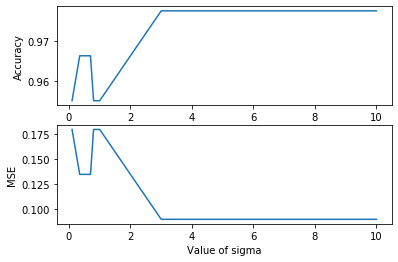

CPU times: user 35.1 s, sys: 1.7 s, total: 36.8 s
Wall time: 28 s


In [20]:
%%time
acc_list2=[]
err_list2=[]
#Looping through Sigma values
for sig in sigma:
    model=RBFN(sig,n_cluster=150,random_centers=True) # Create Model object with 150 centers randomly choosen
    model.train(X_train,y_train)  # Train the model with training dataset
    y_pred=model.predict(X_test) # Predict the output using test dataset
    acc=model.accuracy(y_test,y_pred) # Accuracy of the model
    err=model.mse(y_test,y_pred)  # MSE of the model
    print("Test Accuracy:{}  ; MSE:{}".format(acc,err))
    err_list2.append(err)
    acc_list2.append(acc)

# Ploting accuracy and MSE
fig, ax = plt.subplots(2,1)

ax[0].plot(sigma,acc_list)
ax[0].set_xlabel('Value of sigma')
ax[0].set_ylabel('Accuracy')


ax[1].plot(sigma,err_list)
ax[1].set_xlabel('Value of sigma')
ax[1].set_ylabel('MSE')
plt.show()

**Best Spread parameter = 3**  
- Training accuracy = 99.14  
- Test accuracy = 98.87  
- MSE = 0.04494
- Execution time - 28 sec

### PART:2.2 using K-means 150 centers

Sigma: 0.1
Training Accuracy: 0.9886363636363636
Test Accuracy:0.9550561797752809  ; MSE:0.1797752808988764
Sigma: 0.35
Training Accuracy: 1.0
Test Accuracy:0.9662921348314607  ; MSE:0.1348314606741573
Sigma: 0.5
Training Accuracy: 1.0
Test Accuracy:0.9887640449438202  ; MSE:0.0449438202247191
Sigma: 0.6
Training Accuracy: 1.0
Test Accuracy:0.9662921348314607  ; MSE:0.1348314606741573
Sigma: 0.7
Training Accuracy: 1.0
Test Accuracy:0.9775280898876404  ; MSE:0.0898876404494382
Sigma: 0.8
Training Accuracy: 1.0
Test Accuracy:0.9550561797752809  ; MSE:0.1797752808988764
Sigma: 0.9
Training Accuracy: 0.9971590909090909
Test Accuracy:0.9325842696629213  ; MSE:0.2696629213483146
Sigma: 1
Training Accuracy: 1.0
Test Accuracy:0.9325842696629213  ; MSE:0.2696629213483146
Sigma: 3
Training Accuracy: 0.9914772727272727
Test Accuracy:0.9887640449438202  ; MSE:0.0449438202247191
Sigma: 5
Training Accuracy: 0.9886363636363636
Test Accuracy:0.9887640449438202  ; MSE:0.0449438202247191
Sigma: 7.5
Trai

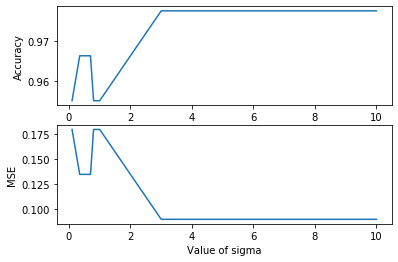

CPU times: user 50.9 s, sys: 1.44 s, total: 52.4 s
Wall time: 35.4 s


In [21]:
%%time
acc_list3=[]
err_list3=[]
#Looping through Sigma values
for sig in sigma:
    model=RBFN(sig,n_cluster=150,k_means=True)  # Create Model object with 150 centers randomly choosen
    model.train(X_train,y_train) # Train the model with training dataset
    y_pred=model.predict(X_test) # Predict the output using test dataset
    acc=model.accuracy(y_test,y_pred) # Accuracy of the model
    err=model.mse(y_test,y_pred)  # MSE of the model
    print("Test Accuracy:{}  ; MSE:{}".format(acc,err))
    err_list3.append(err)
    acc_list3.append(acc)

# Ploting accuracy and MSE
fig, ax = plt.subplots(2,1)

ax[0].plot(sigma,acc_list)
ax[0].set_xlabel('Value of sigma')
ax[0].set_ylabel('Accuracy')


ax[1].plot(sigma,err_list)
ax[1].set_xlabel('Value of sigma')
ax[1].set_ylabel('MSE')
plt.show()

**Best Spread parameter = 3**  
- Training accuracy = 99.14 
- Test accuracy = 98.87  
- MSE = 0.04494
- Execution time - 35.4 sec

## Comparision of all methods

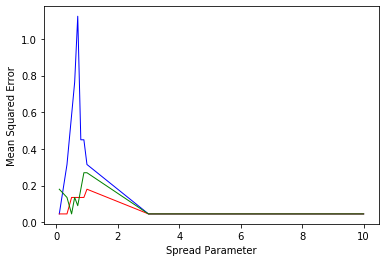

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sigma ,err_list1, color='blue', linewidth=1)
ax.plot(sigma ,err_list2 , color='red', linewidth=1)
ax.plot(sigma ,err_list3, color='green', linewidth=1)
plt.xlabel("Spread Parameter")
plt.ylabel("Mean Squared Error")
plt.show()

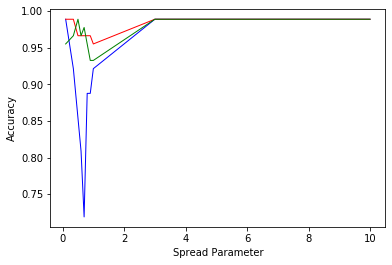

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sigma ,acc_list1, color='blue', linewidth=1)
ax.plot(sigma ,acc_list2 , color='red', linewidth=1)
ax.plot(sigma ,acc_list3, color='green', linewidth=1)
plt.xlabel("Spread Parameter")
plt.ylabel("Accuracy")
plt.show()

# INFERENCE



- The Best Spread parameter from PART 1 we get is 3.
- The Accuracy and MSE are constant after Spread parameter  = 3 , because the gaussian function that we calcualte reachs its maximum value of 1 from $\sigma=3$. So, the weights wont be changed after such point.
- The execution time of using all training inputs as centers is maximum of 68 sec and randomly choosen 150 centers take minimum execution time of 28 sec. And, K-means takes 35.4 sec.
- Among all three, Kmeans seem to be stable. Because, when i tried with different inputs, the accuracy and MSE of test did not fluctuate much whereas other startigies fluctuated a lot.
- CHanging the number of nodes for PART 2: In this case also, KMEANS was giving stable pattern of MSE for each of the sigma values comapred to Randomly choosen center strategy.
- From the comparision graphs, MSE and Accuracy is stable for varying $\sigma$ values in K-Means startegy, and unstable for choosing all centers.